# **$  Introduction  $**

Market basket analysis looks at purchase coincidence. It investigates whether two products are being purchased together, and whether the purchase of one product increases the likelihood of purchasing the other. The data typically encountered in these applications can be arranged in a large matrix of rows and columns. Rows represent the different shoppers (or shopping trips) and columns represent the different products.

Last.fm is a social network, a radio via the Internet and also a music recommendation system that builds profiles and statistics on musical tastes, based on data sent by registered users. Some of these services are paid, but there are still countries where it is still free. On the radio you can select the songs according to personal preferences (according to an algorithm and statistics) or other users. The service is open source. It merged with its sister project Audioscrobbler in August 2005. On May 30, 2007 the Last.fm team announced that it had been acquired by CBS. For more information visit: https://www.last.fm/

## **$ Objective   $**

Our objetive of this notebook is to perform Market Basket Analysis with Association rules, to acomplish this task we're going to be using Python 3, libraries as Pandas, Numpy as well as Matplotlib, Plotly, Bokeh for graphics and Mlxtend for apriori algorithm and association rules. 

In [1]:
import pandas as pd
import numpy as np
import copy
import gc

# Data Description

This dataset contains <user, timestamp, artist, song> tuples collected from __Last.fm API__, using the user.getRecentTracks() method. This dataset represents the whole listening habits (till May, 5th 2009) for nearly 1,000 users. For more information visit: http://ocelma.net/MusicRecommendationDataset/lastfm-1K.html

In [2]:
lastfm_data = pd.read_csv('userid-timestamp-artid-artname-traid-traname.tsv',names = ['userid', 'timestamp','musicbrainz-artist-id','artist_name','musicbrainz-track-id','track-name'], sep='\t',header = None, error_bad_lines=False)

In [3]:
lastfm_data

,userid,timestamp,musicbrainz-artist-id,artist_name,musicbrainz-track-id,track-name
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)
...,...,...,...,...,...,...
19098857,user_001000,2008-01-27T22:02:35Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,a490cabc-1e5c-4807-86c7-740c31a50009,Please Be Patient With Me
19098858,user_001000,2008-01-27T21:56:52Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,3e92e447-9e1f-440d-bc00-6734469880c5,Shake It Off
19098859,user_001000,2008-01-27T21:52:36Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,93d044e6-1bbb-46a6-ac8e-283382a89e6f,Side With The Seeds
19098860,user_001000,2008-01-27T21:49:12Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,5ac4386f-6146-4389-a762-4b43f362d2c8,Sky Blue Sky


# Visualizating Demographics

Our dataset incliudes a file that contains demographics from each user, as we are ignoring demographic information in our analysis, we're just going to give it a glance. 

In [4]:
demo_info = pd.read_csv("userid-profile.tsv",sep='\t', error_bad_lines=False)
demo_info = demo_info.dropna()

In [5]:
demo_info

,#id,gender,age,country,registered
2,user_000003,m,22.0,United States,"Oct 30, 2005"
7,user_000008,m,23.0,Slovakia,"Sep 28, 2006"
8,user_000009,f,19.0,United States,"Jan 13, 2007"
9,user_000010,m,19.0,Poland,"May 4, 2006"
10,user_000011,m,21.0,Finland,"Sep 8, 2005"
...,...,...,...,...,...
356,user_000359,m,31.0,United States,"Aug 21, 2005"
358,user_000361,f,26.0,Poland,"Jan 16, 2007"
361,user_000364,f,29.0,Norway,"Mar 16, 2006"
362,user_000366,m,24.0,Finland,"Dec 12, 2004"


## Sex

For this graphic we used a pie chart from matplotlib library to view the percentage of male and female users.

In [6]:
sex_count = demo_info['gender'].value_counts().to_dict()
m, val_m = list(sex_count.items())[0]
f, val_f = list(sex_count.items())[1]

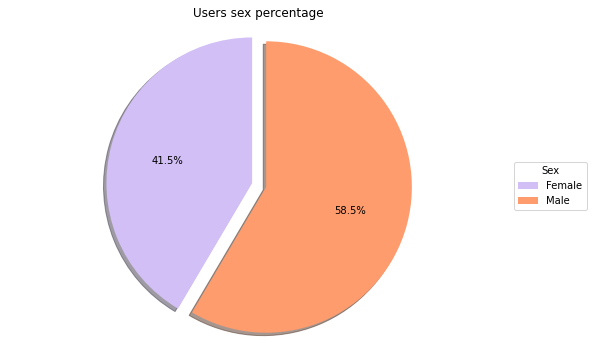

In [7]:
import matplotlib.pyplot as plt

labels = 'Female', 'Male'
sizes = [val_f,val_m]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(9, 6))
wedges, texts, autotexts= ax1.pie(sizes, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90,colors=['#d1bff5','#ff9c6e'])
ax1.axis('equal') 
ax1.set_title("Users sex percentage")
ax1.legend(wedges, labels,
          title="Sex",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig('images/sex.png', format='png', bbox_inches = 'tight')
plt.show()

## Country

For this graphic we needed to convert the countries names to ISO 3166-1 alpha-3 codes (three-letter country codes) wich are part of the ISO 3166 standard published by the International Organization for Standardization (ISO), to represent countries, dependent territories, and special areas of geographical interest.<br>
To acomplish this task we used the library _pycountry_convert_. 

In [8]:
import pycountry_convert as pc

country_count = demo_info['country'].value_counts().to_dict()
demo_country = pd.DataFrame.from_dict(country_count, orient='index',columns=[ 'num_users'])
demo_country.reset_index(inplace=True)
demo_country.rename({'index': 'country'}, axis='columns', inplace=True)
demo_country["iso_alpha"] = demo_country['country'].apply(lambda x : pc.country_name_to_country_alpha3(x, cn_name_format="default") )

It's a world map where the bubbles are the countries where user information was taken, selecting one of the bubbles shows the name of the country, number of users and the iso_alpha code.

In [30]:
import plotly.express as px
import plotly
fig = px.scatter_geo(demo_country, locations="iso_alpha",
                     size="num_users",hover_name="country"
                     ,projection="natural earth",color="country")
fig.update_layout(title_text = 'Number of users by country <br>(Click points to view info)')
plotly.offline.plot(fig, filename='images/map.html')
#fig.show()

'images/map.html'

# Data preprocessing

## Cleaning the data up for our own purposes

In this case we just want to have the userid and artist_name columns so we're going to drop the columns "timestamp","musicbrainz-artist-id","musicbrainz-track-id" and "track-name".

In [10]:
lastfm_data.drop(inplace=True,axis=1,columns=['timestamp','musicbrainz-artist-id','musicbrainz-track-id','track-name'])

In [11]:
lastfm_data

,userid,artist_name
0,user_000001,Deep Dish
1,user_000001,坂本龍一
2,user_000001,坂本龍一
3,user_000001,坂本龍一
4,user_000001,坂本龍一
...,...,...
19098857,user_001000,Wilco
19098858,user_001000,Wilco
19098859,user_001000,Wilco
19098860,user_001000,Wilco


# Frequency

We're getting the frequency of each artist in the whole dataset using the _value_counts()_ funtion from pandas that returns the count of all unique values in the given index and then we convert it to a dictionary.

In [12]:
counts = lastfm_data['artist_name'].value_counts().to_dict()

In [13]:
list(counts.items())[:10]

[('Radiohead', 115099),
 ('The Beatles', 100126),
 ('Nine Inch Nails', 84317),
 ('Muse', 63144),
 ('Coldplay', 62212),
 ('Depeche Mode', 59609),
 ('Pink Floyd', 58484),
 ('Death Cab For Cutie', 58046),
 ('Placebo', 53492),
 ('Elliott Smith', 50202)]

Creating a dictionary with the top 100 artists

In [14]:
top100_artist = dict(list(counts.items())[:100])

In [15]:
len(top100_artist)

100

## Creatting a pandas dataframe to store the top 100 values

In [16]:
top100_df = pd.DataFrame.from_dict(top100_artist, orient='index', columns=['item_frequency'])
top100_df.reset_index(inplace=True)
top100_df.rename({'index': 'artist_name'}, axis='columns', inplace=True)

In [17]:
top100_df

,artist_name,item_frequency
0,Radiohead,115099
1,The Beatles,100126
2,Nine Inch Nails,84317
3,Muse,63144
4,Coldplay,62212
...,...,...
95,Morrissey,21209
96,Weezer,21161
97,Garbage,20922
98,A Perfect Circle,20858


## Visualization

For this graphic we needed to convert the artists names and the frequency to python list, then we define the settings for our plot (height, width, title, labels, etc). We used the vbar chart from bokeh, to make it interactive we added a __Slider__ (so you can change the number of artists displayed) which makes use of a callback code in Javascript and a __Hoover__, we also change the angle of the labels on the x axis. <br>
On the x-axis we have the names of the artists and on the y-axis the item absolute frequency in _scientific notation_, the colors of the bars are made with the "viridis" color palette that changes as the frequency decreases, the color with more frequency would be the one we see as dark purple and yellow the one with less frequency, selecting one of the bars shows the name of the artist and the frequency in _standard form_.

In [28]:
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, LinearColorMapper, LogTicker, ColorBar, CustomJS, Slider, HoverTool
from bokeh.plotting import figure, save
from bokeh.transform import factor_cmap
import bokeh.palettes as pal
from bokeh.models.widgets import Slider
from bokeh.layouts import widgetbox, column
from bokeh.core.properties import value
from bokeh.models.ranges import FactorRange
import math

output_notebook()

artist = top100_df['artist_name'].tolist()
frequency = top100_df['item_frequency'].tolist()
pallette= pal.viridis(100)


source = ColumnDataSource(data=dict(artist=artist, frequency=frequency))

p = figure(x_range=artist, plot_height=500,plot_width=980, toolbar_location='above', 
           title="Top 100 Most listened artists until 2009",
           x_axis_label='Artist',y_axis_label='Item absolute frequency')

renderers= p.vbar(x='artist', top='frequency', width=0.9, source=source,
       line_color='white', fill_color=factor_cmap('artist',palette=pallette, factors=artist))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 120000
p.xaxis.major_label_orientation = math.pi/2
p.x_range.range_padding = 0.01
p.add_tools(HoverTool(tooltips=[("ARTIST", "@artist"), ("FREQUENCY", "@frequency")]))

callback = CustomJS(args=dict(fig=p, xr=renderers.data_source.data['artist']), code="""
    var A = slider.value;
    fig.x_range.factors = [];
    for (i = 0; i < A; i++) {
      fig.x_range.factors.push(xr[i])
    }
""")

p.x_range.js_on_change('factors', callback)

slider = Slider(start=1, end=100, value=100, step=1, title="Number of artists")

callback.args["slider"] = slider

#slider.js_on_change('slider', callback)
layout = column(p, widgetbox(slider))
#output_file("top100.html")
show(layout)

Loading BokehJS ...

## Preparing to create a list of transactions

Create a empty dataframe to store new values, the dataframe must have the same name in the columns, otherwise pandas will send a warning

In [19]:
df_1 = pd.DataFrame(columns=['userid', 'artist_name'])
df_1

,userid,artist_name


Create a new dataframe with just the records in the dictionary with the top 100 artist

In [20]:
for i,j in top100_artist.items():
    aux = lastfm_data[lastfm_data.artist_name == i]
    df_1 = df_1.append(aux)

In [21]:
df_1

,userid,artist_name
1425,user_000001,Radiohead
5168,user_000001,Radiohead
5169,user_000001,Radiohead
5170,user_000001,Radiohead
5261,user_000001,Radiohead
...,...,...
18895603,user_000990,Evanescence
18907758,user_000992,Evanescence
18946451,user_000994,Evanescence
18946593,user_000994,Evanescence


For each user create a dataframe containing the artists they've listened to without repeating and append it to a new dataframe, for this task we used pandas function _drop_duplicates()_.

In [22]:
df_2 = pd.DataFrame(columns=['userid', 'artist_name'])

In [23]:
i= 1
while i <= 1000:
    aux= str(i)
    if len(aux) == 1:
        user_id= 'user_00000'+str(i)
        aux1 = df_1[df_1.userid == user_id].copy()
        aux1.drop_duplicates(subset='artist_name', keep='first', inplace=True)
        df_2 = df_2.append(aux1)
        i+=1
    if len(aux) == 2:
        user_id= 'user_0000'+str(i)
        aux1 = df_1[df_1.userid == user_id].copy()
        aux1.drop_duplicates(subset='artist_name', keep='first', inplace=True)
        df_2 = df_2.append(aux1)
        i+=1
    if len(aux) == 3:
        user_id= 'user_000'+str(i)
        aux1 = df_1[df_1.userid == user_id].copy()
        aux1.drop_duplicates(subset='artist_name', keep='first', inplace=True)
        df_2 = df_2.append(aux1)
        i+=1
    if len(aux) == 4:
        user_id= 'user_00'+str(i)
        aux1 = df_1[df_1.userid == user_id].copy()
        aux1.drop_duplicates(subset='artist_name', keep='first', inplace=True)
        df_2 = df_2.append(aux1)
        i+=1

In [24]:
df_2

,userid,artist_name
1425,user_000001,Radiohead
2521,user_000001,Coldplay
13359,user_000001,Red Hot Chili Peppers
1163,user_000001,Björk
15609,user_000001,U2
...,...,...
19080953,user_001000,Regina Spektor
19081568,user_001000,Iron & Wine
19080916,user_001000,Feist
19080964,user_001000,Wilco


In [25]:
gc.collect()

44

Create a list of list where each list contains the artists that each user have listened to in a single field.

In [26]:
t_list= []
i= 1
while i <= 1000:
    aux= str(i)
    if len(aux) == 1:
        user_id= 'user_00000'+str(i)
        aux1 = df_2[df_2.userid == user_id].copy()
        my_list = aux1["artist_name"].tolist()
        t_list.append(my_list)
        i+=1
    if len(aux) == 2:
        user_id= 'user_0000'+str(i)
        aux1 = df_2[df_2.userid == user_id].copy()
        my_list = aux1["artist_name"].tolist()
        t_list.append(my_list)
        i+=1
    if len(aux) == 3:
        user_id= 'user_000'+str(i)
        aux1 = df_2[df_2.userid == user_id].copy()
        my_list = aux1["artist_name"].tolist()
        t_list.append(my_list)
        i+=1
    if len(aux) == 4:
        user_id= 'user_00'+str(i)
        aux1 = df_2[df_2.userid == user_id].copy()
        my_list = aux1["artist_name"].tolist()
        t_list.append(my_list)
        i+=1

## From now on view this as a list of "transactions"

In [27]:
len(t_list)

1000

In [28]:
t_list[0]

['Radiohead',
 'Coldplay',
 'Red Hot Chili Peppers',
 'Björk',
 'U2',
 'Oasis',
 'Boards Of Canada',
 'Moby',
 'Röyksopp']

In [29]:
t_list[999]

['Radiohead',
 'The Beatles',
 'Coldplay',
 'Death Cab For Cutie',
 'Elliott Smith',
 'Kanye West',
 'Sigur Rós',
 'Bloc Party',
 'Arcade Fire',
 'Modest Mouse',
 'Daft Punk',
 'Air',
 'The Smashing Pumpkins',
 'Belle And Sebastian',
 'The White Stripes',
 'Sufjan Stevens',
 'Franz Ferdinand',
 'The Shins',
 'Beck',
 'Massive Attack',
 'Boards Of Canada',
 'Kings Of Leon',
 'Yeah Yeah Yeahs',
 'Pj Harvey',
 'Broken Social Scene',
 'Portishead',
 'The Postal Service',
 'Mogwai',
 'Cat Power',
 'Röyksopp',
 'Regina Spektor',
 'Iron & Wine',
 'Feist',
 'Wilco',
 'The Decemberists']

# Transaction Encoder

Using TransactionEncoder object from mxltend, we can transform this data into an array format suitable for typical machine learning APIs. Via the fit method, the TransactionEncoder learns the unique labels in the list, and via the transform method, it transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array. After fitting, the unique column names that correspond to the data array shown above can be accessed via the columns_ attribute:

In [30]:
import mlxtend
from mlxtend.preprocessing import TransactionEncoder

In [31]:
enc = TransactionEncoder()
T_cod = enc.fit(t_list).transform(t_list)

In [32]:
enc.columns_

['A Perfect Circle',
 'Ac/Dc',
 'Air',
 'Arcade Fire',
 'Arctic Monkeys',
 'Beck',
 'Belle And Sebastian',
 'Björk',
 'Black Rebel Motorcycle Club',
 'Bloc Party',
 'Blur',
 'Boards Of Canada',
 'Bob Dylan',
 'Bright Eyes',
 'Britney Spears',
 'Broken Social Scene',
 'Cat Power',
 'Chemistry',
 'Coldplay',
 'Daft Punk',
 'David Bowie',
 'Death Cab For Cutie',
 'Depeche Mode',
 'Elliott Smith',
 'Evanescence',
 'Feist',
 'Foo Fighters',
 'Franz Ferdinand',
 'Garbage',
 'Gorillaz',
 "Guns N' Roses",
 'In Flames',
 'Incubus',
 'Interpol',
 'Iron & Wine',
 'Johnny Cash',
 'Joy Division',
 'Kanye West',
 'Keane',
 'Kings Of Leon',
 'Ladytron',
 'Madonna',
 'Mando Diao',
 'Marilyn Manson',
 'Massive Attack',
 'Metallica',
 'Metric',
 'Michael Jackson',
 'Moby',
 'Modest Mouse',
 'Mogwai',
 'Morrissey',
 'Muse',
 'Nine Inch Nails',
 'Nirvana',
 'Oasis',
 'Patrick Wolf',
 'Pearl Jam',
 'Pink Floyd',
 'Pixies',
 'Pj Harvey',
 'Placebo',
 'Portishead',
 'Queen',
 'Queens Of The Stone Age',
 'R.E

For our convenience, we can turn the encoded array into a pandas dataframe:

In [33]:
data = pd.DataFrame(T_cod, columns=enc.columns_)

In [34]:
data

,A Perfect Circle,Ac/Dc,Air,Arcade Fire,Arctic Monkeys,Beck,Belle And Sebastian,Björk,Black Rebel Motorcycle Club,Bloc Party,...,The Smiths,The Strokes,The White Stripes,Tool,Tori Amos,Travis,U2,Weezer,Wilco,Yeah Yeah Yeahs
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,True,True,True,True,True,True,False,True,True,...,True,True,True,False,False,True,True,True,True,True
2,False,True,True,True,True,True,False,False,False,True,...,False,False,True,True,False,False,True,True,False,True
3,True,False,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,False,True,True,True
4,False,True,True,False,False,False,False,True,False,False,...,False,False,True,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,True,False,False,True,False,False,False,True,...,True,False,True,False,True,True,True,True,False,False
996,False,False,False,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
997,False,False,True,True,True,True,True,False,True,True,...,True,True,True,False,False,True,False,False,True,True
998,True,False,True,False,True,False,True,False,True,True,...,False,True,True,True,False,True,False,True,True,False


In [35]:
gc.collect()

88

# Apriori Algorithm

Apriori function to extract frequent itemsets for association rule mining

In [36]:
from mlxtend.frequent_patterns import apriori

We look for artists (or groups of artists) who have support lager than 0.25 (25%)

In [37]:
frequent_itemsets = apriori(data, min_support=0.25, use_colnames=True, verbose=1)

Processing 312 combinations | Sampling itemset size 8e 76


In [38]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [39]:
frequent_itemsets

,support,itemsets,length
0,0.296,(A Perfect Circle),1
1,0.356,(Ac/Dc),1
2,0.551,(Air),1
3,0.478,(Arcade Fire),1
4,0.457,(Arctic Monkeys),1
...,...,...,...
78782,0.252,"(Coldplay, The White Stripes, The Beatles, The...",7
78783,0.251,"(The Cure, Coldplay, The Strokes, Muse, The Ki...",7
78784,0.255,"(The Cure, Coldplay, The White Stripes, Muse, ...",7
78785,0.262,"(Coldplay, The White Stripes, The Strokes, Mus...",7


# Association Rules

Function to generate association rules from frequent itemsets.

In [40]:
from mlxtend.frequent_patterns import association_rules

The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.

In [41]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [42]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))

In [43]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(A Perfect Circle),(Radiohead),0.296,0.710,0.255,0.861486,1.213361,0.044840,2.093659,1
1,(Radiohead),(A Perfect Circle),0.710,0.296,0.255,0.359155,1.213361,0.044840,1.098549,1
2,(Coldplay),(Ac/Dc),0.636,0.356,0.264,0.415094,1.165995,0.037584,1.101032,1
3,(Ac/Dc),(Coldplay),0.356,0.636,0.264,0.741573,1.165995,0.037584,1.408522,1
4,(Guns N' Roses),(Ac/Dc),0.417,0.356,0.261,0.625899,1.758144,0.112548,1.721462,1
...,...,...,...,...,...,...,...,...,...,...
1357149,(The Beatles),"(Coldplay, The White Stripes, The Strokes, The...",0.615,0.280,0.253,0.411382,1.469222,0.080800,1.223204,1
1357150,(The Strokes),"(Coldplay, The White Stripes, The Beatles, The...",0.487,0.274,0.253,0.519507,1.896012,0.119562,1.510949,1
1357151,(The Killers),"(Coldplay, The White Stripes, The Beatles, The...",0.577,0.275,0.253,0.438475,1.594454,0.094325,1.291127,1
1357152,(Franz Ferdinand),"(Coldplay, The White Stripes, The Beatles, The...",0.562,0.270,0.253,0.450178,1.667326,0.101260,1.327702,1


## Selecting and Filtering Results

As you can see there are good results but maybe some are not good enough. Pandas DataFrames make it easy to filter the results further. <br>
Example 1: Let’s say we are ony interested in rules that satisfy the following criteria:

In [44]:
rules[ (rules['antecedent_len'] >= 2) &
      (rules['lift'] >= 1.85) &
       (rules['confidence'] >= 0.95) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
679567,"(Arcade Fire, Arctic Monkeys, The Strokes, Blo...",(Interpol),0.263,0.497,0.250,0.950570,1.912616,0.119289,10.176077,4
688237,"(Arcade Fire, Modest Mouse, Beck, Franz Ferdin...",(Interpol),0.273,0.497,0.260,0.952381,1.916259,0.124319,10.563000,4
689617,"(Arcade Fire, Modest Mouse, Beck, Muse)",(Interpol),0.264,0.497,0.251,0.950758,1.912993,0.119792,10.214769,4
689827,"(Arcade Fire, Beck, The Strokes, Modest Mouse)",(Interpol),0.263,0.497,0.250,0.950570,1.912616,0.119289,10.176077,4
701167,"(Arcade Fire, The Cure, Bloc Party, Modest Mouse)",(Interpol),0.266,0.497,0.253,0.951128,1.913738,0.120798,10.292154,4
701526,"(Arcade Fire, Pixies, The Strokes, Bloc Party)",(Interpol),0.267,0.497,0.255,0.955056,1.921642,0.122301,11.191750,4
717697,"(Arcade Fire, The Cure, Franz Ferdinand, Modes...",(Interpol),0.264,0.497,0.252,0.954545,1.920615,0.120792,11.066000,4
722258,"(Arcade Fire, The Cure, Yeah Yeah Yeahs, Modes...",(Interpol),0.263,0.497,0.250,0.950570,1.912616,0.119289,10.176077,4
759667,"(Beck, The Strokes, Bloc Party, Modest Mouse)",(Interpol),0.263,0.497,0.252,0.958175,1.927917,0.121289,12.026273,4
761017,"(Beck, The Strokes, Bloc Party, Yeah Yeah Yeahs)",(Interpol),0.262,0.497,0.251,0.958015,1.927596,0.120786,11.980545,4


We look for artists (or groups of artists) who have lift score lager than 1.85 and who give confidence to another artist that is larger than 0.95 (95%).
For example, listening "Beck", "Oasis", "Placebo" and "Coldplay" has support 0.252, and the confidence for "Radiohead", "The Killers" given that someone listens to "Beck", "Oasis", "Placebo" and "Coldplay" is 0.950943 ≈ (95%).

Example 2:

In [45]:
rules[ (rules['antecedent_len'] <= 2) &
      (rules['lift'] >= 2.4) &
       (rules['confidence'] >= 0.70) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
1215151,"(The Shins, Interpol)","(Arcade Fire, Radiohead, Bloc Party, Modest Mo...",0.357,0.293,0.254,0.711485,2.428275,0.149399,2.450476,2
1217941,"(The Shins, Interpol)","(Arcade Fire, Coldplay, Radiohead, Modest Mouse)",0.357,0.299,0.257,0.719888,2.407652,0.150257,2.502570,2
1219673,"(The Shins, Interpol)","(Arcade Fire, Franz Ferdinand, Radiohead, Mode...",0.357,0.291,0.256,0.717087,2.464216,0.152113,2.506069,2
1221413,"(The Shins, Interpol)","(Arcade Fire, The Cure, Radiohead, Modest Mouse)",0.357,0.295,0.253,0.708683,2.402317,0.147685,2.420048,2
1288624,"(The Shins, Interpol)","(The Cure, Radiohead, Bloc Party, Modest Mouse)",0.357,0.294,0.252,0.705882,2.400960,0.147042,2.400400,2


Listening to both "Interpol" and "The Shins" lifts the chance of listening to any of these bands or artists like "Radiohead", "Bloc Party", "Arcade Fire, "Franz Ferdinand", "The Cure" by a factor of 2.4 (average lift = 2.4). If we know that a user listens to "Interpol" and "The Shins" we should definitely recommend that he also listens to any of these bands/artists mentioned above.<br>
Just as these examples there could be many more, it all depends on the criteria to be considered.

# Conclusion

In conclusion we have that the visualization of the data is an important part to understand the problem or task that we are performing, nowadays there are a variety of libraries such as Bokeh,Plotly, Seaborn that help us and facilitate the visualization process. Python together with all it’s libraries form a work environment suitable for all tasks related to datascience such as data mining, machine learning, data analysis, etc. In this particular case we usethe mlxtend library that contains implementations for Transaction Encoder, Apriori Algorithm and Association Rules which are very well elaborated, as well as the results obtained proved to be quite reliable and useful for Market Basket Analysis and therefore for recommendation systems.

# References

- [Agrawal, 1994] Agrawal, R. (1994).Fast Algorithms for Mining Association Rules.  [online]Available at: https://www.it.uu.se/edu/course/homepage/infoutv/ht08/vldb94_rj.pdf.
- [Ledolter, 2013] Ledolter, J. (2013).Data Mining and Business Analytics with R. First Edition.John Wiley & Sons, Inc.
- [Moffit, 2017] Moffit,  C. (2017).Introduction to Market Basket Analysis in Python -Practical business Python.  [online] Pbpython.com. Available at:  https://pbpython.com/market-basket-analysis.html.
- [Raschka, 2019a] Raschka, S. (2014-2019a).Apriori - mlxtend. [online] Rasbt.github.io. Availableat: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/.
- [Raschka, 2019b] Raschka,  S.  (2014-2019b).Association  rules  -  mlxtend.[on-line] Rasbt.github.io. Available at:  http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/.
- [Raschka, 2019c] Raschka,  S.  (2014-2019c).TransactionEncoder  -  mlxtend.[online]Rasbt.github.io. Available at:  http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/.